In [1]:
library(ggplot2)
library(plyr)
library(readxl)

In [2]:
auto_mobile <- read.csv("datasets/Automobile.csv")

In [3]:
head(auto_mobile, 5)

,ï..symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [4]:
dim(auto_mobile)

[1] 201  26

In [5]:
colnames(auto_mobile)

[1] "ï..symboling"        "normalized_losses"   "make"               
 [4] "fuel_type"           "aspiration"          "number_of_doors"    
 [7] "body_style"          "drive_wheels"        "engine_location"    
[10] "wheel_base"          "length"              "width"              
[13] "height"              "curb_weight"         "engine_type"        
[16] "number_of_cylinders" "engine_size"         "fuel_system"        
[19] "bore"                "stroke"              "compression_ratio"  
[22] "horsepower"          "peak_rpm"            "city_mpg"           
[25] "highway_mpg"         "price"

In [6]:
auto_mobile[ ,c("symboling", "make", "body_style")] <- list(NULL)

In [7]:
dim(auto_mobile)

[1] 201  24

In [8]:
colSums(is.na(auto_mobile))

ï..symboling   normalized_losses           fuel_type          aspiration 
                  0                   0                   0                   0 
    number_of_doors        drive_wheels     engine_location          wheel_base 
                  0                   0                   0                   0 
             length               width              height         curb_weight 
                  0                   0                   0                   0 
        engine_type number_of_cylinders         engine_size         fuel_system 
                  0                   0                   0                   0 
               bore              stroke   compression_ratio          horsepower 
                  0                   0                   0                   0 
           peak_rpm            city_mpg         highway_mpg               price 
                  0                   0                   0                   0

In [9]:
str(auto_mobile)

'data.frame':	201 obs. of  24 variables:
 $ ï..symboling       : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized_losses  : int  168 168 168 164 164 161 158 168 158 192 ...
 $ fuel_type          : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration         : chr  "std" "std" "std" "std" ...
 $ number_of_doors    : chr  "two" "two" "two" "four" ...
 $ drive_wheels       : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine_location    : chr  "front" "front" "front" "front" ...
 $ wheel_base         : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length             : num  169 169 171 177 177 ...
 $ width              : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height             : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb_weight        : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine_type        : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ number_of_cylinders: chr  "four" "four" "six" "four" ...
 $ engine_size        : int  130 130 152 109 136 136 136 13

In [10]:
unique(auto_mobile$fuel_type)

[1] "gas"    "diesel"

In [11]:
table(auto_mobile$fuel_type)


diesel    gas 
    20    181 

In [12]:
table(auto_mobile$number_of_doors)


four  two 
 114   87 

In [13]:
table(auto_mobile$number_of_cylinders)


 eight   five   four    six  three twelve    two 
     4     10    157     24      1      1      4 

In [14]:
options(repr.plot.width = 6, repr.plot.height = 3.5)

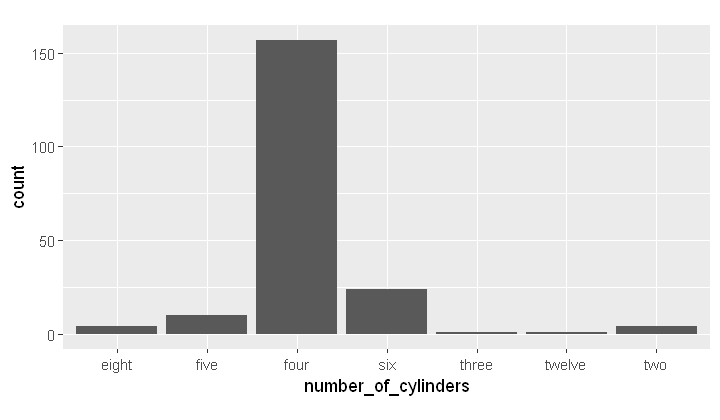

In [15]:
g <- ggplot(auto_mobile, aes(number_of_cylinders))

g + geom_bar() + theme(aspect.ratio = 0.5)

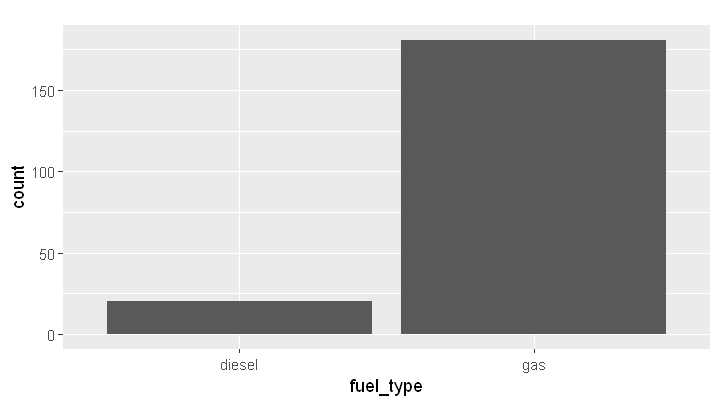

In [16]:
g <- ggplot(auto_mobile, aes(fuel_type))

g + geom_bar() + theme(aspect.ratio = 0.5)

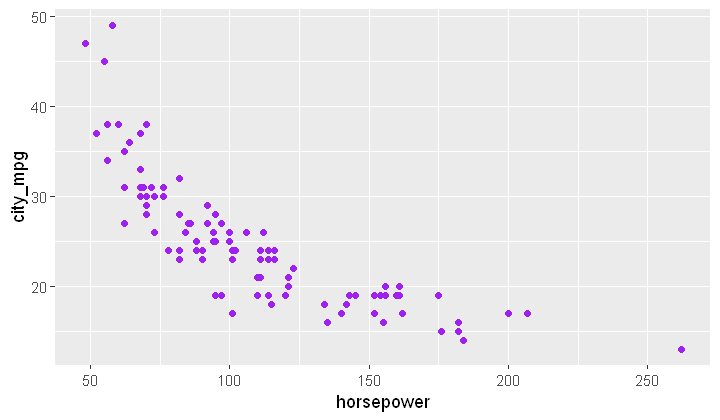

In [17]:
ggplot(auto_mobile, aes(x = horsepower, y = city_mpg)) + geom_point(col = "purple")

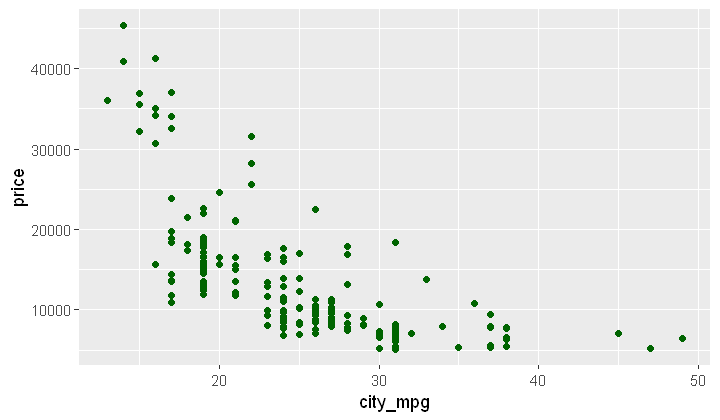

In [18]:
ggplot(auto_mobile, aes(x=city_mpg, y=price)) + geom_point(col="darkgreen")

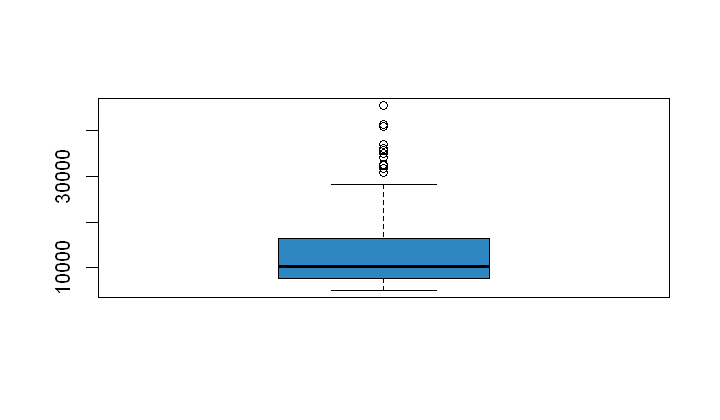

In [19]:
price_boxplot <- boxplot(auto_mobile$price, col="#2E86C1")

In [20]:
price_boxplot

5118
7775
10295
16500
28248
9322.646
11267.354


In [21]:
price_boxplot$out

[1] 30760 41315 36880 32250 35550 36000 31600 34184 35056 40960 45400 32528
[13] 34028 37028

In [22]:
auto_mobile <- auto_mobile[-which(auto_mobile$price %in% price_boxplot$out),]

In [23]:
dim(auto_mobile)

[1] 187  24

In [24]:
#write.csv(auto_mobile, file="datasets/auto_mobiles_processed.csv", row.names=FALSE)